# ITviec Reviews - Sentiment Analysis & Clustering

## Project Overview
This notebook implements an end-to-end system to analyze employee reviews from ITviec:
1. **Sentiment Classification**: Classify reviews as positive, neutral, or negative
2. **Company Clustering**: Group companies based on review characteristics

---

## Table of Contents
1. Basic Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing Pipeline
4. Model Development
5. Clustering Analysis
6. Dashboard Implementation

---


# 1 · Basic Data Exploration

## Quick shape / schema checks  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
pd.options.mode.chained_assignment = None


In [2]:
# Load data
RAW_PATH = "data/Reviews.xlsx"
SHEET    = 0  

df = pd.read_excel(RAW_PATH, sheet_name=SHEET)
print(f"✅ Loaded {df.shape[0]:,} rows · {df.shape[1]} columns")
display(df.head())


✅ Loaded 8,417 rows · 13 columns


,id,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,Office & workspace,Recommend?
0,4,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,4,4,Yes
1,4,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,4,5,Yes
2,4,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,3,3,Yes
3,4,Accenture,February 2025,good environment for fresher,good env. for fresher to learn and improve the...,Need to forcus more on benefit and evaluate co...,3,2,2,3,4,4,No
4,4,Accenture,February 2023,"Môi trường làm việc thoải mái, vui vẻ","- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",- Phát triển văn phòng để rộng rãi hơn\n- Công...,4,3,4,4,4,3,Yes


## 1-2 Quick schema + NA check

In [3]:
print("\nDataFrame info ⇣")
df.info()

print("\nMissing values per column ⇣")
na_series = df.isna().sum().sort_values(ascending=False)
display(na_series[na_series > 0])

display(df.describe(include="all").T.head(15))



DataFrame info ⇣
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8417 non-null   int64 
 1   Company Name                 8417 non-null   object
 2   Cmt_day                      8417 non-null   object
 3   Title                        8417 non-null   object
 4   What I liked                 8416 non-null   object
 5   Suggestions for improvement  8412 non-null   object
 6   Rating                       8417 non-null   int64 
 7   Salary & benefits            8417 non-null   int64 
 8   Training & learning          8417 non-null   int64 
 9   Management cares about me    8417 non-null   int64 
 10  Culture & fun                8417 non-null   int64 
 11  Office & workspace           8417 non-null   int64 
 12  Recommend?                   8417 non-null   object
dtypes: int64(7), ob

Suggestions for improvement    5
What I liked                   1
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,8417.0,NaN,NaN,NaN,256.994178,114.732313,4.0,182.0,223.0,339.0,477.0
Company Name,8417,180,FPT Software,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cmt_day,8417,107,July 2021,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,8417,6951,Môi trường làm việc tốt,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What I liked,8416,8405,"Kiến thức trang bị đầy đủ hàng tháng, các job ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suggestions for improvement,8412,7724,Đi làm ở công ty này lương cao quá. k xứng đán...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,8417.0,NaN,NaN,NaN,4.072116,0.97529,1.0,3.0,4.0,5.0,5.0
Salary & benefits,8417.0,NaN,NaN,NaN,3.733872,1.071243,1.0,3.0,4.0,5.0,5.0
Training & learning,8417.0,NaN,NaN,NaN,3.960912,0.99751,1.0,3.0,4.0,5.0,5.0
Management cares about me,8417.0,NaN,NaN,NaN,3.89046,1.091305,1.0,3.0,4.0,5.0,5.0


## 1-3 Combine text columns into single review string


In [4]:
TEXT_COLS = ["What I liked", "Suggestions for improvement"]
df["review"] = (
    df[TEXT_COLS]
    .fillna("")
    .agg(" ".join, axis=1)
    .str.strip()
)

print("Sample combined review ↓")
display(df[["review"]].head(3))


Sample combined review ↓


,review
0,"Môi trường thoải mái, ít áp lực, có thể làm vi..."
1,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn..."
2,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương..."


## 1-4 Distribution of Rating (1-5 stars)


/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_48055/1597466220.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, palette="viridis")


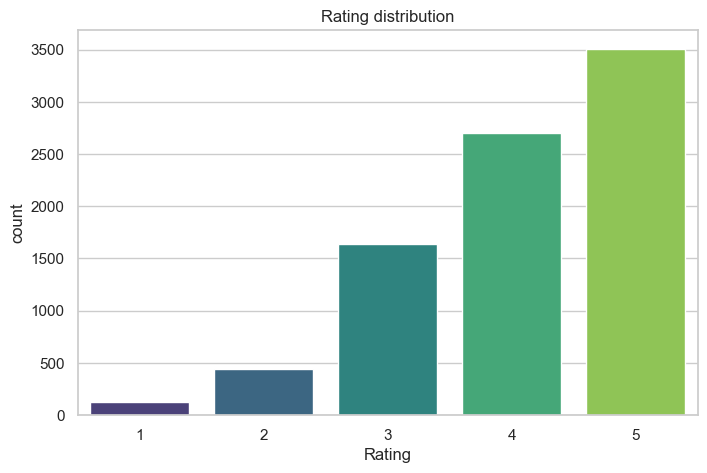

In [5]:
sns.countplot(x="Rating", data=df, palette="viridis")
plt.title("Rating distribution")
plt.show()



## 1-5 Distribution of Recommend? (Yes / No)


/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_48055/3307502376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=RECOMM_COL, data=df, order=order, palette="Set2")


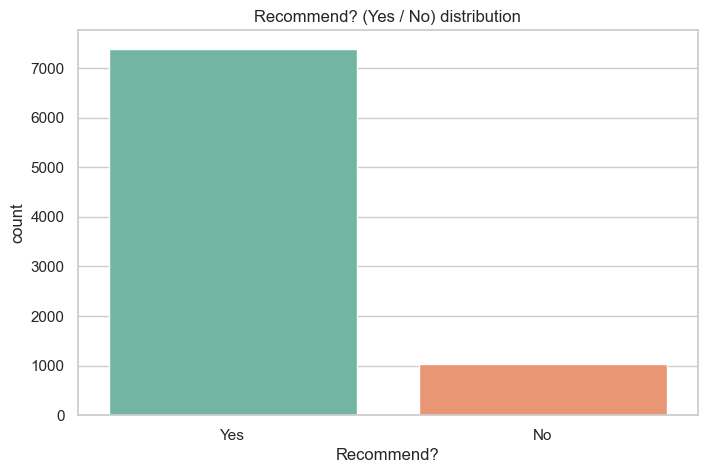

In [6]:
RECOMM_COL = "Recommend?"
order = df[RECOMM_COL].value_counts().index
sns.countplot(x=RECOMM_COL, data=df, order=order, palette="Set2")
plt.title("Recommend? (Yes / No) distribution")
plt.show()


## 1-6 Review length (token count)


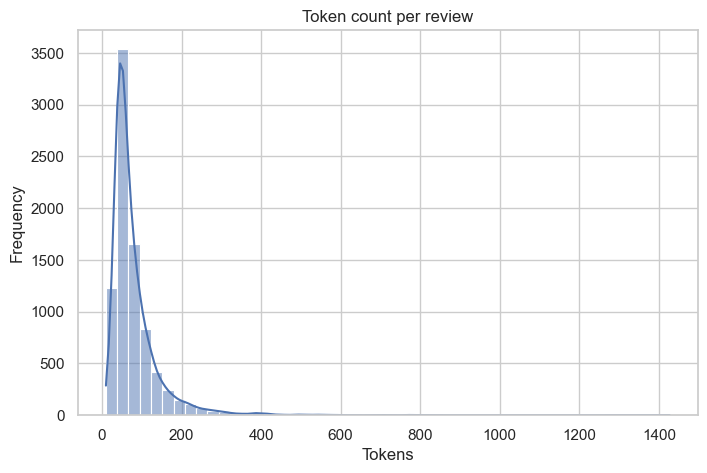

count    8417.000000
mean       80.260069
std        67.910656
min        10.000000
25%        44.000000
50%        60.000000
75%        93.000000
90%       143.000000
95%       194.000000
max      1427.000000
Name: token_cnt, dtype: float64


In [7]:
df["token_cnt"] = df["review"].str.split().apply(len)
sns.histplot(df["token_cnt"], bins=50, kde=True)
plt.title("Token count per review")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.show()

print(df["token_cnt"].describe(percentiles=[.25, .5, .75, .9, .95]))


## 1-7 Top-10 companies by review count


/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_48055/1982945428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


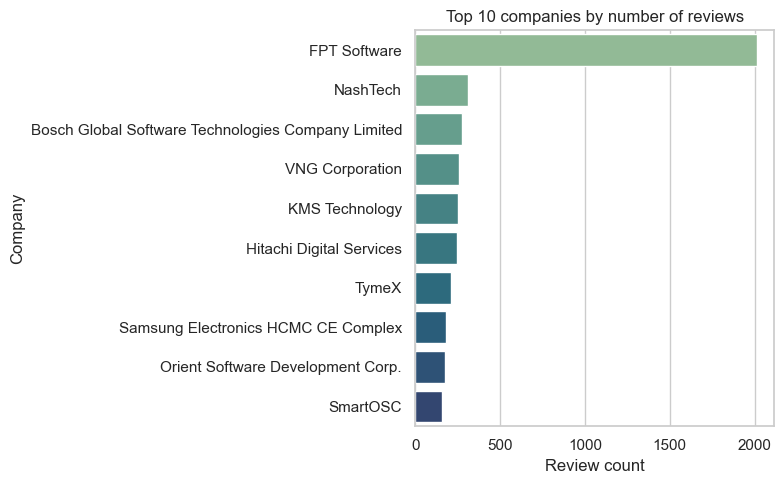

,Company Name,review_count
0,FPT Software,2014
1,NashTech,308
2,Bosch Global Software Technologies Company Lim...,278
3,VNG Corporation,259
4,KMS Technology,251
5,Hitachi Digital Services,249
6,TymeX,213
7,Samsung Electronics HCMC CE Complex,184
8,Orient Software Development Corp.,176
9,SmartOSC,158


In [8]:
top_companies = (
    df["Company Name"]
    .value_counts()
    .head(10)
    .rename_axis("Company Name")
    .reset_index(name="review_count")
)

# plot
sns.barplot(
    y="Company Name",
    x="review_count",
    data=top_companies,
    palette="crest"
)
# use len(top_companies) (10) or hard-code 10
plt.title(f"Top {len(top_companies)} companies by number of reviews")
plt.xlabel("Review count")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# display the DataFrame
display(top_companies)



## 1-8 Duplicate check


In [9]:
no_of_duplicated_rows = df.duplicated().sum()
print(f"Found {no_of_duplicated_rows:,} full-row duplicates")


Found 0 full-row duplicates


## 1-9 Save snapshot for faster reloads later


In [10]:
SNAPSHOT_PATH = "outputs/raw_snapshot.csv"
df.to_csv(SNAPSHOT_PATH, index=False)
print(f"Snapshot saved → {SNAPSHOT_PATH}")


Snapshot saved → outputs/raw_snapshot.csv


# 2 · Exploratory Data Analysis (EDA) <a id="exploratory-data-analysis"></a>

In [11]:
df = pd.read_csv("outputs/raw_snapshot.csv")
print("Snapshot re-loaded:", df.shape)

Snapshot re-loaded: (8417, 15)


In [12]:
NUMERIC_SUBSCORES = [
    "Salary & benefits",
    "Training & learning",
    "Management cares about me",
    "Culture & fun",
    "Office & workspace",
]

## 2-1 Rating × Recommend


Recommend?,No,Yes
Rating,,
1,122,2
2,407,39
3,411,1228
4,73,2625
5,14,3496


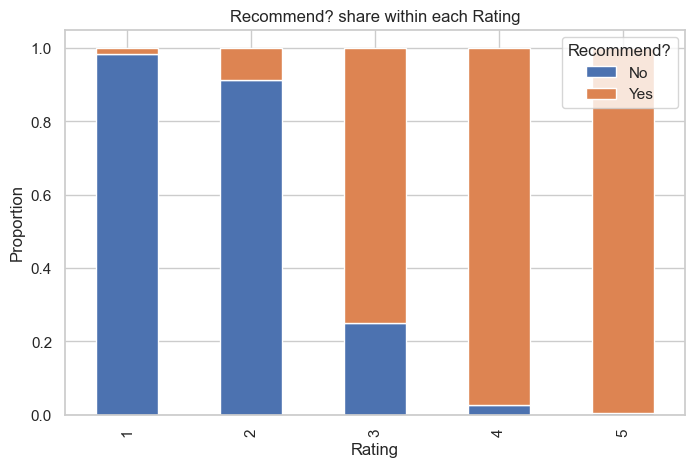

In [13]:
cross_tab = pd.crosstab(df["Rating"], df["Recommend?"])
display(cross_tab.style.background_gradient(cmap="YlGnBu"))

cross_tab_normalized = cross_tab.div(cross_tab.sum(1), axis=0)  
cross_tab_normalized.plot(kind="bar", stacked=True)
plt.title("Recommend? share within each Rating")
plt.ylabel("Proportion")
plt.legend(title="Recommend?", loc="upper right")
plt.show()


Những điểm chính: Mối quan hệ giữa Xếp hạng và Đề xuất
- Tương quan mạnh mẽ: Có một mối tương quan dương rất rõ rệt giữa xếp hạng (rating) của người dùng và việc họ có đề xuất (recommend) công ty hay không.

- Tín hiệu tiêu cực rõ ràng: Các đánh giá 1 và 2 sao gần như luôn đi kèm với câu trả lời "Không" cho việc đề xuất. Đây là những chỉ báo rõ ràng về một trải nghiệm làm việc tiêu cực.

- Tín hiệu tích cực rõ ràng: Ngược lại, các đánh giá 4 và 5 sao chiếm tỷ lệ áp đảo dẫn đến câu trả lời "Có" cho việc đề xuất, cho thấy một trải nghiệm làm việc tích cực.

## 2-2 Sub-score distributions


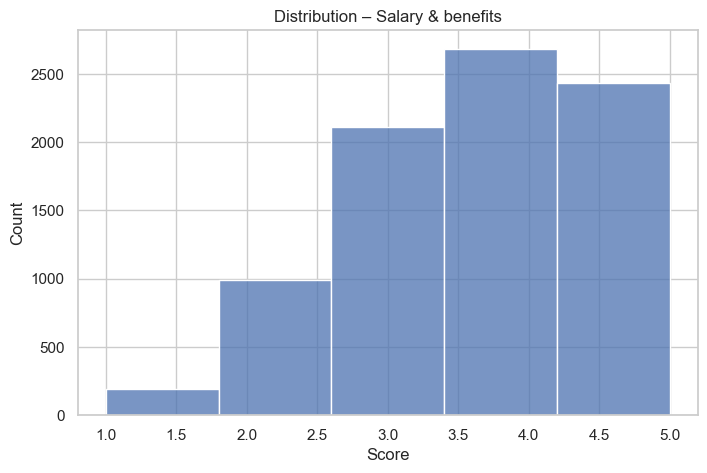

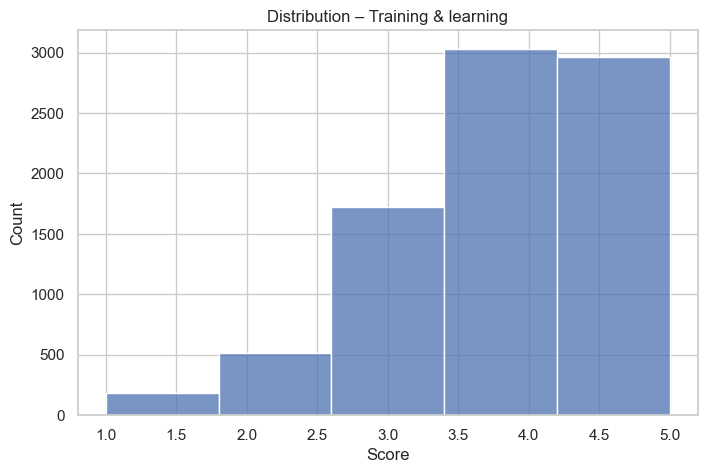

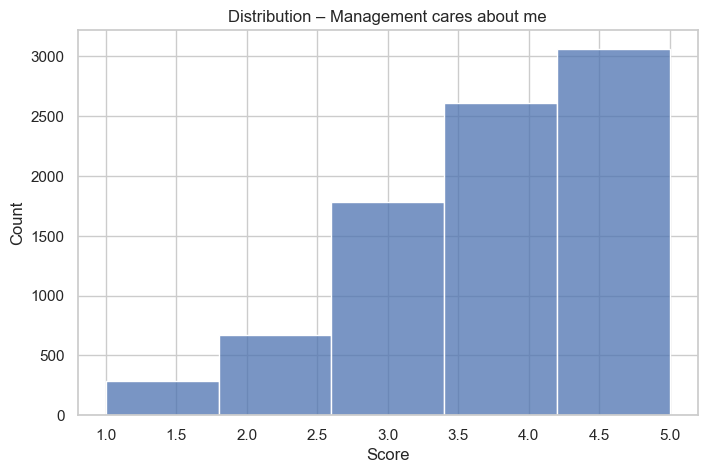

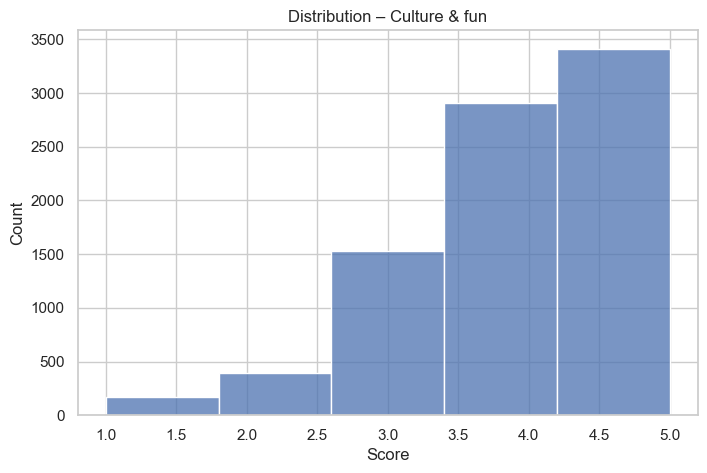

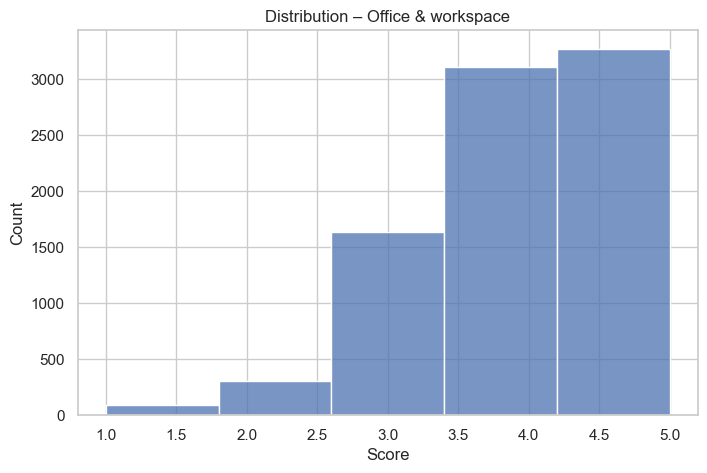

In [14]:
for col in NUMERIC_SUBSCORES:
    if col in df.columns:
        sns.histplot(df[col], bins=5, kde=False)
        plt.title(f"Distribution – {col}")
        plt.xlabel("Score")
        plt.ylabel("Count")
        plt.show()


## 2-3 Correlation heatmap (numeric cols)


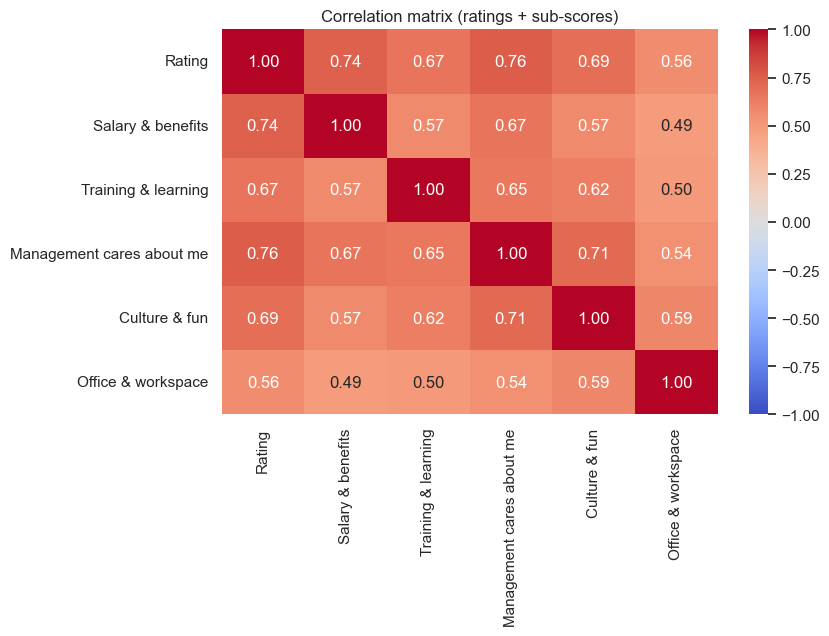

In [15]:
sub_df = df[["Rating"] + NUMERIC_SUBSCORES].dropna()
correlation   = sub_df.corr()

sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix (ratings + sub-scores)")
plt.show()


Những điểm chính từ Ma trận tương quan của các đánh giá
- Quản lý là Yếu tố then chốt: Yếu tố có tương quan mạnh nhất đến Rating tổng thể là "Management cares about me" (Quản lý quan tâm đến tôi) (0.76). Điều này cho thấy chất lượng quản lý là động lực quan trọng nhất tạo nên một bài đánh giá tích cực.

- Lương bổng là Vấn đề quan trọng: "Salary & benefits" (Lương và phúc lợi) (0.74) là yếu tố có ảnh hưởng lớn thứ hai, cho thấy chế độ đãi ngộ là một phần quan trọng của sự hài lòng của nhân viên.

- Môi trường làm việc là thứ yếu: Mặc dù vẫn quan trọng, "Office & workspace" (Văn phòng & không gian làm việc) (0.56) có tương quan yếu nhất với Rating tổng thể. Điều này ngụ ý rằng nhân viên ưu tiên văn hóa và quản lý hơn là các tiện ích vật chất của văn phòng.

- Văn hóa và Quản lý có liên kết: Có một mối quan hệ chặt chẽ giữa "Management cares about me" và "Culture & fun" (Văn hóa & Vui vẻ) (0.71). Điều này nhấn mạnh rằng quản lý tốt là nền tảng để tạo ra một văn hóa làm việc tích cực và vui vẻ.

## 2-4 Word cloud before preprocessing


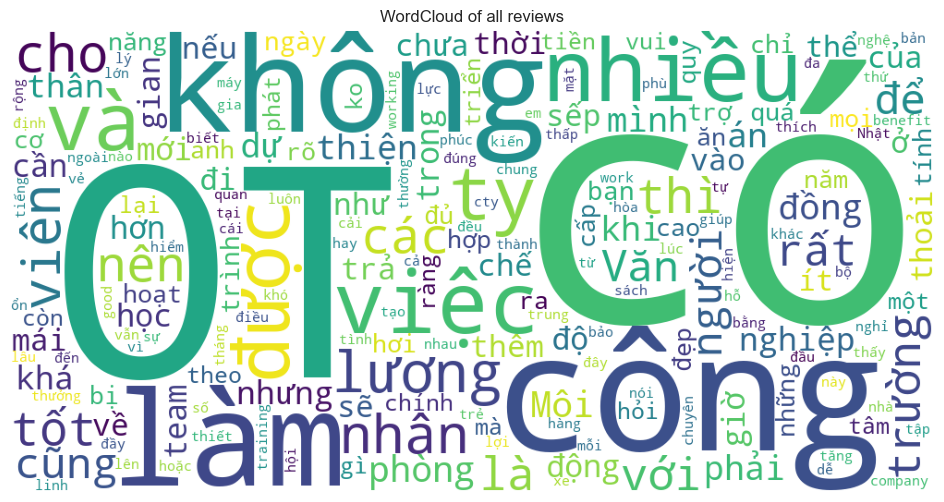

In [16]:
from wordcloud import WordCloud
txt = " ".join(df["review"].astype(str))
wc = WordCloud(
    width=1000, height=500, background_color="white",
    max_words=200, collocations=False).generate(txt)
plt.figure(figsize=(12,6)); plt.imshow(wc); plt.axis("off")
plt.title("WordCloud of all reviews"); plt.show()

# 3 · Data Preprocessing Pipeline <a id="data-preprocessing-pipeline"></a>


In [17]:
import unicodedata
import regex as re
from tqdm.auto import tqdm
from underthesea import word_tokenize

tqdm.pandas()


## 3-1 Load preprocessing dictionaries and resources 


In [18]:

print("Sample combined review ↓")
display(df[["review"]].head(10))


Sample combined review ↓


,review
0,"Môi trường thoải mái, ít áp lực, có thể làm vi..."
1,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn..."
2,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương..."
3,good env. for fresher to learn and improve the...
4,"- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ..."
5,- Được cấp laptop làm việc\n- Môi trường làm v...
6,- Cấp lap mới khi đi làm\n- Có cafe pha máy th...
7,- Laptop và các thiết bị khá xịn xò\n- Môi trư...
8,"Sếp rất thân thiện, luôn cười và luôn có cách ..."
9,Dynamic and young work force\nGreat working en...


In [19]:
# Load Cleaning Resources
def _load_txt(fn):
    with open(fn, encoding="utf8") as f:
        return [l.strip() for l in f if l.strip()]
def _load_dict(fn):
    d = {}
    with open(fn, encoding="utf8") as f:
        for line in f:
            if line.strip():
                k, v = line.rstrip("\n").split("\t", 1)
                d[k] = v
    return d

DATA_PATH = "data/"
stopwords = set(_load_txt(DATA_PATH + "vietnamese-stopwords.txt"))
wrong_words = set(_load_txt(DATA_PATH + "wrong-word.txt"))
teencode_dict = _load_dict(DATA_PATH + "teencode.txt")
emojicon_dict = _load_dict(DATA_PATH + "emojicon.txt")
eng2vn_dict = _load_dict(DATA_PATH + "english-vnmese.txt")
pos_words = _load_txt(DATA_PATH + "positive_VN.txt")
neg_words = _load_txt(DATA_PATH + "negative_VN.txt")

## 3-2 Compile regex & define cleaner

In [20]:
PUNCT_RE  = re.compile(r"[^\p{L}\p{N}\s]", flags=re.UNICODE)
MULTI_RE  = re.compile(r"\s+")

EMOJI_RE  = re.compile("|".join(map(re.escape, emojicon_dict)))
TEEN_RE   = re.compile(r"\b(" + "|".join(map(re.escape, teencode_dict)) + r")\b")
ENG_RE    = re.compile(r"\b(" + "|".join(map(re.escape, eng2vn_dict)) + r")\b",
                       flags=re.IGNORECASE)

REP_CHAR_RE = re.compile(r"(\p{L})\1{2,}", flags=re.UNICODE)
NEG_PREFIXES   = ["không", "chẳng", "chả", "chưa"]
INTEN_PREFIXES = ["rất", "quá", "hơi", "cực kỳ", "vô cùng"]

In [21]:
def normalize_repeated_characters(txt: str, max_repeat: int = 2) -> str:
    return REP_CHAR_RE.sub(lambda m: m.group(1) * max_repeat, txt)

def _join_prefixes(txt: str) -> str:
    """
    Join negation / intensifier prefixes with the following token:
      "không tốt"  →  "không_tốt"
      "cực kỳ tuyệt" → "cực_kỳ_tuyệt"
    """
    # single-word prefixes
    for p in NEG_PREFIXES + INTEN_PREFIXES:
        txt = re.sub(rf"\b{p}\s+(\w+)", rf"{p}_\1", txt)

    # two-word prefixes
    txt = re.sub(r"\bcực\s+kỳ\s+(\w+)",  r"cực_kỳ_\1",  txt)
    txt = re.sub(r"\bvô\s+cùng\s+(\w+)", r"vô_cùng_\1", txt)
    return txt

def clean_vn(text: str) -> str:
    if not isinstance(text, str): text = ""
    txt = unicodedata.normalize("NFC", text.lower())
    txt = EMOJI_RE.sub(" ", txt)
    txt = TEEN_RE.sub(lambda m: teencode_dict[m.group(0)], txt)
    txt = ENG_RE.sub(lambda m: eng2vn_dict[m.group(0).lower()], txt)
    txt = normalize_repeated_characters(txt)
    txt = _join_prefixes(txt)
    txt = PUNCT_RE.sub(" ", txt)
    txt = MULTI_RE.sub(" ", txt).strip()
    tokens = [
        tok for tok in word_tokenize(txt, format="text").split()
        if tok not in stopwords and tok not in wrong_words and len(tok) > 1
    ]
    return " ".join(tokens)


## 3-3 Apply cleaner


In [22]:
import os

CLEANED_PATH = "outputs/clean_reviews.csv"

if os.path.exists(CLEANED_PATH):
    print(f"✅ Found '{CLEANED_PATH}', loading cleaned reviews...")
    df = pd.read_csv(CLEANED_PATH)
    display(df.head(3))
else:
    print("🔄 No cleaned reviews found. Cleaning all reviews (may take a few minutes)...")
    df["clean_review"] = df["review"].progress_apply(clean_vn)
    print("⏩ Done. Example cleaned:")
    display(df[["review", "clean_review"]].head(3))
    df.to_csv(CLEANED_PATH, index=False)
    print(f"💾 Saved cleaned reviews to {CLEANED_PATH}")

✅ Found 'outputs/clean_reviews.csv', loading cleaned reviews...


,id,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,...,review,token_cnt,clean_review,clean_len,positive_word_count,positive_word_list,negative_word_count,negative_word_list,sentiment,label
0,4,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,...,"Môi trường thoải mái, ít áp lực, có thể làm vi...",89,môi_trường thoải_mái áp_lực làm_việc hybrid lư...,30,4,"['tốt', 'chuyên', 'tốt']",1,['áp'],positive,2
1,4,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,...,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",66,cơ_sở_vật_chất đẹp công_ty trẻ trung_năng_động...,26,0,[],0,[],neutral,1
2,4,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,...,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",73,mội thân_thiện giúp_đỡ lẫn chương_trình intern...,28,3,"['chuyên', 'hài', 'thân']",0,[],positive,2


In [23]:
NEGATION_WORDS = ["không", "chưa", "chẳng", "chả"]

def join_negations(text, pos_lexicon, neg_lexicon):
    for neg in NEGATION_WORDS:
        for word in pos_lexicon:
            text = re.sub(rf"{neg}\s+{word}", f"{neg}_{word}", text)
        for word in neg_lexicon:
            text = re.sub(rf"{neg}\s+{word}", f"{neg}_{word}", text)
    return text

# After clean_vn, but before counting:
df["clean_review"] = df["clean_review"].apply(lambda t: join_negations(t, pos_words, neg_words))

In [24]:
# Remove empty after cleaning
df = df.loc[df["clean_review"].str.strip().astype(bool)].reset_index(drop=True)

## 3-4 Length stats

In [25]:
df["clean_len"] = df["clean_review"].str.split().str.len()
print(df["clean_len"].describe(percentiles=[.25, .5, .75, .9, .95]))

count    8417.000000
mean       29.388737
std        23.307775
min         3.000000
25%        17.000000
50%        22.000000
75%        34.000000
90%        52.000000
95%        69.000000
max       463.000000
Name: clean_len, dtype: float64


## 3-5 Lexicon counts

In [26]:
def _count(token_list, text_lower):
    c, hits = 0, []
    for tok in token_list:
        n = text_lower.count(tok)
        if n:
            c += n
            hits.append(tok)
    return c, hits

pos_words = _load_txt(DATA_PATH + "positive_VN.txt")
neg_words = _load_txt(DATA_PATH + "negative_VN.txt")

In [27]:
df[["positive_word_count", "positive_word_list"]] = df["clean_review"].apply(
    lambda s: pd.Series(_count(pos_words, s))
)
df[["negative_word_count", "negative_word_list"]] = df["clean_review"].apply(
    lambda s: pd.Series(_count(neg_words, s))
)

## 3-6 Generate labels

In [28]:
def lexicon_sent(row):
    text = row['clean_review']
    # 1. Handle explicit negation: "không tốt" = negative, "không tệ" = positive
    for word in pos_words:
        if f"không_{word}" in text:
            return "negative"
    for word in neg_words:
        if f"không_{word}" in text:
            return "positive"
    # 2. Fallback: Compare positive/negative counts
    pos = row.positive_word_count
    neg = row.negative_word_count
    if pos > neg:
        return "positive"
    elif neg > pos:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df.apply(lexicon_sent, axis=1)
label_map = {"negative": 0, "neutral": 1, "positive": 2}
df["label"] = df["sentiment"].map(label_map)


## 3-7 Save cleaned data for re-use


In [29]:
required_cols = [
    "id", "Company Name", "review", "clean_review",
    "positive_word_count", "negative_word_count",
    "sentiment", "label"
]
for col in required_cols:
    if col not in df.columns:
        print(f"WARNING: Missing column {col}")
df.to_csv("outputs/clean_reviews.csv", index=False)
print("💾 Saved → outputs/clean_reviews.csv")

💾 Saved → outputs/clean_reviews.csv


# 4 · Model Development <a id="model-development"></a>

## 4-1 Prepare data


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [31]:
df = pd.read_csv("outputs/clean_reviews.csv")
X = df["clean_review"].astype(str)
y = df["label"]

## 4-2 Split Train/Test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape[0]} samples, Test set: {X_test.shape[0]} samples")

Training set: 6733 samples, Test set: 1684 samples


## 4-3 Upsample (RandomOverSampler) for Classic ML

In [34]:
from imblearn.over_sampling import RandomOverSampler

vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=10000,
    min_df=5,
    sublinear_tf=True
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Upsample to handle class imbalance
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_vec, y_train)
print("After upsampling (Classic ML):", np.bincount(y_res))

# Save the fitted vectorizer
joblib.dump(vectorizer, "outputs/tfidf_vectorizer.joblib")
print("💾 Saved vectorizer to outputs/tfidf_vectorizer.joblib")

After upsampling (Classic ML): [4546 4546 4546]
💾 Saved vectorizer to outputs/tfidf_vectorizer.joblib


## 4-4 Classic ML Models


=== Naive Bayes ===
              precision    recall  f1-score   support

    Negative      0.416     0.632     0.502       239
     Neutral      0.469     0.513     0.490       308
    Positive      0.857     0.741     0.795      1137

    accuracy                          0.684      1684
   macro avg      0.581     0.629     0.595      1684
weighted avg      0.723     0.684     0.698      1684



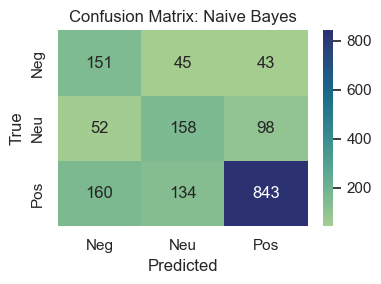


=== Logistic Regression ===
              precision    recall  f1-score   support

    Negative      0.697     0.607     0.649       239
     Neutral      0.568     0.731     0.639       308
    Positive      0.909     0.864     0.886      1137

    accuracy                          0.803      1684
   macro avg      0.725     0.734     0.725      1684
weighted avg      0.817     0.803     0.807      1684



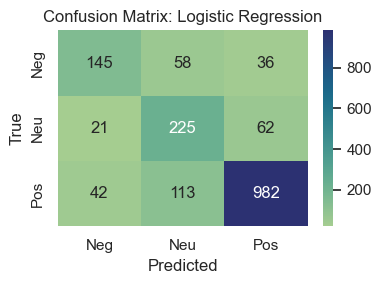


=== Random Forest ===
              precision    recall  f1-score   support

    Negative      0.854     0.464     0.602       239
     Neutral      0.494     0.825     0.618       308
    Positive      0.887     0.811     0.847      1137

    accuracy                          0.764      1684
   macro avg      0.745     0.700     0.689      1684
weighted avg      0.810     0.764     0.770      1684



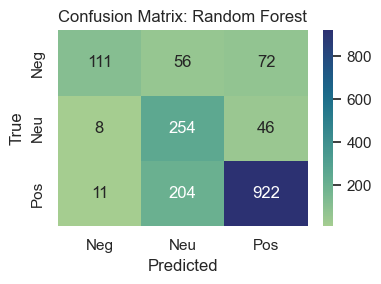


=== KNN ===
              precision    recall  f1-score   support

    Negative      0.332     0.259     0.291       239
     Neutral      0.208     0.773     0.328       308
    Positive      0.819     0.254     0.388      1137

    accuracy                          0.350      1684
   macro avg      0.453     0.429     0.336      1684
weighted avg      0.638     0.350     0.363      1684



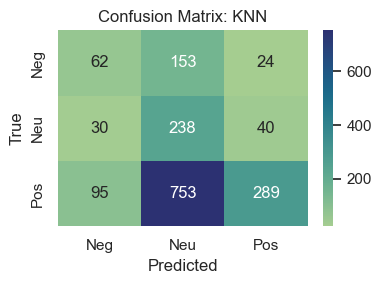

[02:01:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.


=== XGBoost ===
              precision    recall  f1-score   support

    Negative      0.918     0.703     0.796       239
     Neutral      0.742     0.821     0.780       308
    Positive      0.923     0.942     0.933      1137

    accuracy                          0.886      1684
   macro avg      0.861     0.822     0.836      1684
weighted avg      0.889     0.886     0.885      1684



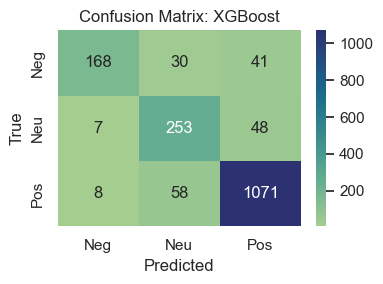


=== SVM ===
              precision    recall  f1-score   support

    Negative      0.729     0.640     0.682       239
     Neutral      0.591     0.633     0.611       308
    Positive      0.885     0.890     0.887      1137

    accuracy                          0.808      1684
   macro avg      0.735     0.721     0.727      1684
weighted avg      0.809     0.808     0.808      1684



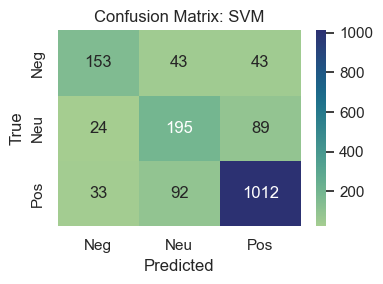

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier



models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=400, solver="lbfgs", multi_class="auto", class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=120, max_depth=20, random_state=42, n_jobs=-1, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "XGBoost": XGBClassifier(n_estimators=120, max_depth=20, random_state=42, n_jobs=-1, class_weight='balanced'),
    "SVM": LinearSVC(class_weight='balanced'),
}

results = []
for name, clf in models.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test_vec)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3, target_names=["Negative", "Neutral", "Positive"]))
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1": f1_score(y_test, y_pred, average="macro")
    })
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest',
                xticklabels=["Neg", "Neu", "Pos"], yticklabels=["Neg", "Neu", "Pos"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()
    
    plt.savefig(f"outputs/confusionMatrix_{name.replace(' ', '')}.png")
    plt.close()

KNN
Insight: KNN struggles to distinguish negative/neutral reviews—most samples are misclassified as "Neutral". Low accuracy for both "Negative" and "Positive" classes.

Logistic Regression
Insight: Well-balanced performance. Good at correctly classifying all classes, especially "Positive" and "Negative". Few misclassifications, showing strong overall reliability.

Naive Bayes
Insight: Tends to predict "Positive" too often—many neutral and negative reviews are misclassified as positive. Not recommended for tasks where class balance is important.

phoBERT
Insight: Best overall balance and accuracy. Very strong at detecting all three classes, especially "Positive" and "Neutral". Minimal confusion between classes.

Random Forest
Insight: Predicts "Positive" and "Neutral" well, but often mistakes "Negative" reviews as "Positive". May not be ideal if identifying negative sentiment is critical.

SVM
Insight: Good general performance, with most errors between "Neutral" and "Positive". Decent at separating "Negative" reviews, but some overlap remains.

XGBoost
Insight: Strongest at detecting "Positive" sentiment, very few false positives. Excellent if prioritizing accuracy for "Positive" reviews, but some neutral/negative confusion.

## 4-5 Compare model results

,Model,Accuracy,Precision,Recall,F1
4,XGBoost,0.886,0.861,0.822,0.836
5,SVM,0.808,0.735,0.721,0.727
1,Logistic Regression,0.803,0.725,0.734,0.725
2,Random Forest,0.764,0.745,0.700,0.689
0,Naive Bayes,0.684,0.581,0.629,0.595
3,KNN,0.350,0.453,0.429,0.336


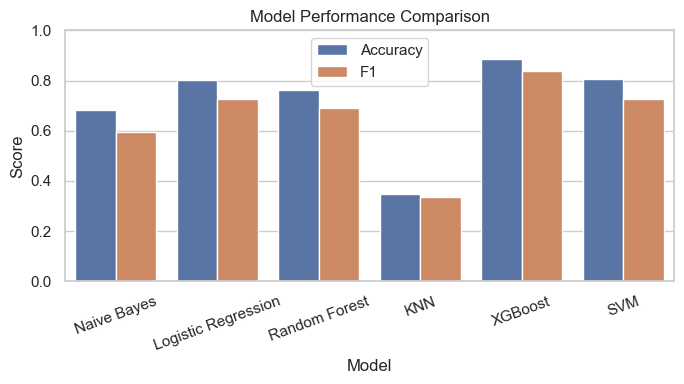

In [36]:
results_df = pd.DataFrame(results)
results_df.to_csv("outputs/model_results.csv", index=False)
display(
    results_df.sort_values("F1", ascending=False)
    .style.format({"Accuracy": "{:.3f}", "Precision": "{:.3f}", "Recall": "{:.3f}", "F1": "{:.3f}"})
)

plt.figure(figsize=(7, 4))
sns.barplot(data=results_df.melt(id_vars="Model", value_vars=["Accuracy", "F1"]), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title=None)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("outputs/ModelPerformanceChart.png")
plt.show()

### Insgihts for all models
-XGBoost is the top performers, both in Accuracy and F1, making it best for practical deployment.

-SVM and Logistic Regression also perform well, but slightly behind the top one.

-Random Forest and Naive Bayes are moderate, with reasonable scores but lower than SVM/XGBoost/phoBERT.

-KNN shows poor performance (lowest Accuracy & F1), and is not suitable for this task.

## 4-6 Save the XGBoost Model

In [37]:
xgb_model = models["XGBoost"]  # Access the trained XGBoost model
if not os.path.exists("outputs"):
    os.makedirs("outputs")
joblib.dump(xgb_model, "outputs/xgboost_sentiment_model.joblib")
print("💾 Saved XGBoost model to outputs/xgboost_sentiment_model.joblib")

💾 Saved XGBoost model to outputs/xgboost_sentiment_model.joblib


## 4-7 Interactive Widget for Sentiment

In [38]:
import ipywidgets as widgets

text_input = widgets.Text(
    placeholder='Nhập câu tiếng Việt...',
    description='Nhận xét:',
    disabled=False,
    layout=widgets.Layout(width='80%')
)
button = widgets.Button(description="Phân tích cảm xúc")
output_label = widgets.Label()

def on_button_click(b):
    text = text_input.value
    if text.strip():
        # Transform the input text using the fitted vectorizer
        text_vectorized = vectorizer.transform([text])
        # Predict using XGBoost
        pred = xgb_model.predict(text_vectorized)[0]
        output_label.value = f"Cảm xúc dự đoán: {label_map[pred]}"
    else:
        output_label.value = "Vui lòng nhập câu!"

button.on_click(on_button_click)
display(text_input, button, output_label)

Text(value='', description='Nhận xét:', layout=Layout(width='80%'), placeholder='Nhập câu tiếng Việt...')

Button(description='Phân tích cảm xúc', style=ButtonStyle())

Label(value='')

# 5 · Clustering Analysis <a id="clustering-analysis"></a>

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## 5-1 Prepare Data

In [40]:
df = pd.read_csv("outputs/clean_reviews.csv")
MIN_REVIEWS = 5
review_counts = df["Company Name"].value_counts()
valid_companies = review_counts[review_counts >= MIN_REVIEWS].index
docs = (
    df[df["Company Name"].isin(valid_companies)]
    .groupby("Company Name")["clean_review"]
    .apply(lambda x: " ".join(x))
    .reset_index()
)
print(f"🚀 Clustering {len(docs)} companies")

🚀 Clustering 160 companies


## 5-2 Stopwords and noise words

In [41]:
with open("data/vietnamese-stopwords.txt", encoding="utf8") as f:
    vn_stopwords = set(f.read().split())

noise_words = {
    "cty", "ko", "ng", "la", "nhiê_u", "nh", "cu", "râ", "đươ", "ca", "pha", "ho", "cty", "ct", "công_ty",
    "làm_việc", "công_việc", "văn_phòng", "team", "company", "job", "apply", "work", "jobs",
    "employees", "employee", "người", "the", "is", "in", "for", "to", "it", "of", "on", "and", "good", "bad", "không", "lương", "tốt", "hơi"
}
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
all_stopwords = vn_stopwords | set(ENGLISH_STOP_WORDS) | noise_words

def normalize_text(text):
    import unicodedata
    import re
    text = unicodedata.normalize("NFC", str(text))
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)
    return text

from underthesea import word_tokenize
def custom_tokenizer(text):
    text = normalize_text(text.lower())
    tokens = word_tokenize(text, format="text").split()
    tokens = [t for t in tokens if t not in all_stopwords and len(t) > 2]
    return tokens

docs["lda_text"] = docs["clean_review"].map(lambda t: " ".join(custom_tokenizer(t)))
docs = docs.loc[docs["lda_text"].str.len() > 0].reset_index(drop=True)

## 5-3 Compare 3 models

In [42]:
n_topics = 3
n_clusters = 3

vectorizer = CountVectorizer(
    tokenizer=str.split,
    min_df=3,
    max_df=0.9,
    max_features=2000
)
tfidf = vectorizer.fit_transform(docs["lda_text"])
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
topic_mat = lda.fit_transform(tfidf)

/Users/ssyan110/Development/Graduation_project/project1/.venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [43]:
clustering_results = []

def evaluate_clustering(algo_name, labels, data_matrix):
    n_clusters = len(set(labels))
    if n_clusters < 2: return {"algo": algo_name, "k": n_clusters, "sil": -1}
    return {"algo": algo_name, "k": n_clusters,
            "sil": silhouette_score(data_matrix, labels)}

# 1) KMeans
km_labels = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42).fit_predict(topic_mat)
clustering_results.append(evaluate_clustering("KMeans", km_labels, topic_mat))

# 2) Agglomerative
agglo_labels = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward").fit_predict(topic_mat)
clustering_results.append(evaluate_clustering("Agglomerative", agglo_labels, topic_mat))

# 3) Gaussian Mixture
gmm_labels = GaussianMixture(n_components=n_clusters, random_state=42).fit_predict(topic_mat)
clustering_results.append(evaluate_clustering("GaussianMixture", gmm_labels, topic_mat))

# Show results
cluster_res_df = pd.DataFrame(clustering_results).sort_values("sil", ascending=False).reset_index(drop=True)
print("\n--- Clustering: Comparison of 3 Algorithms (n_topics=3, n_clusters=3) ---")
display(cluster_res_df)
best_run = cluster_res_df.iloc[0]
print(f"\n🏆 Best Algorithm ⇒ {best_run.algo} with k={best_run.k} (Silhouette={best_run.sil:.3f})")

docs["cluster"] = km_labels



--- Clustering: Comparison of 3 Algorithms (n_topics=3, n_clusters=3) ---


,algo,k,sil
0,KMeans,3,0.556419
1,Agglomerative,3,0.539588
2,GaussianMixture,3,0.353545



🏆 Best Algorithm ⇒ KMeans with k=3 (Silhouette=0.556)


## 5-5 PCA for visualization

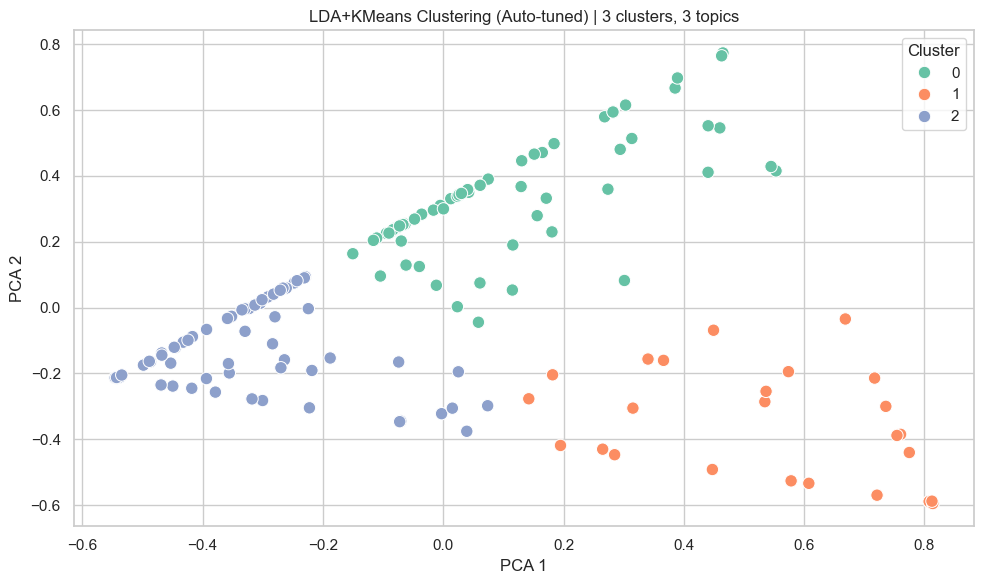

In [44]:
pca = PCA(n_components=2)
coords = pca.fit_transform(topic_mat)
docs["x"] = coords[:, 0]
docs["y"] = coords[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=docs, x="x", y="y", hue="cluster", palette="Set2", s=80)
plt.title(f"LDA+KMeans Clustering (Auto-tuned) | {n_clusters} clusters, {n_topics} topics")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


## 5-6 Top words per topic

In [45]:
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"🔑 Topic {topic_idx}: {', '.join(top_words)}")

🔑 Topic 0: dự_án, sếp, đồng_nghiệp, tiền, đào_tạo, rõ_ràng, tùy, học_hỏi, quy_trình, đội
🔑 Topic 1: đồng_nghiệp, đội, sếp, hoạt_động, phát_triển, đầy_đủ, khô, rõ_ràng, chính_sách, anh_em
🔑 Topic 2: đội, overtime, đồng_nghiệp, hoạt_động, đời_sống, chính_sách, chuyên_nghiệp, rõ_ràng, văn_hóa, đào_tạo


## 5-7 Word cloud per cluster

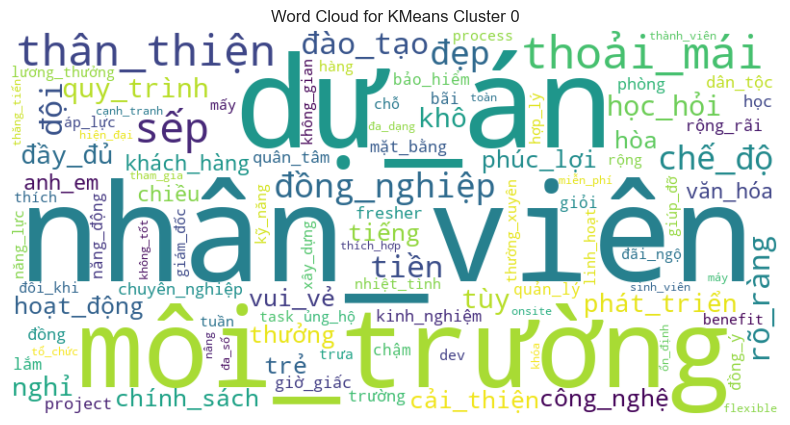

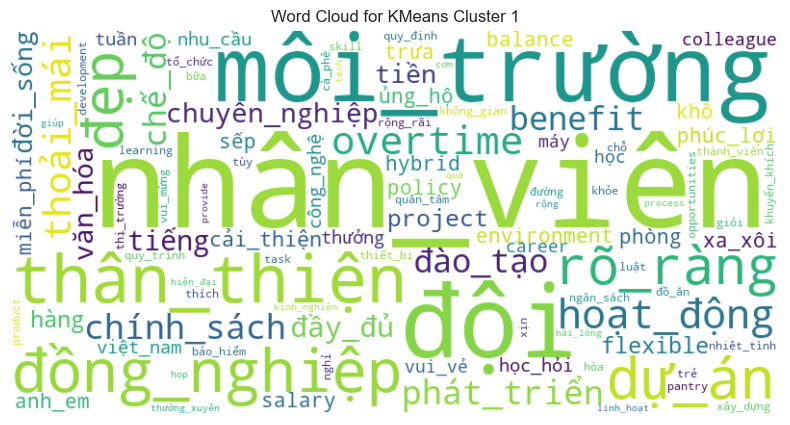

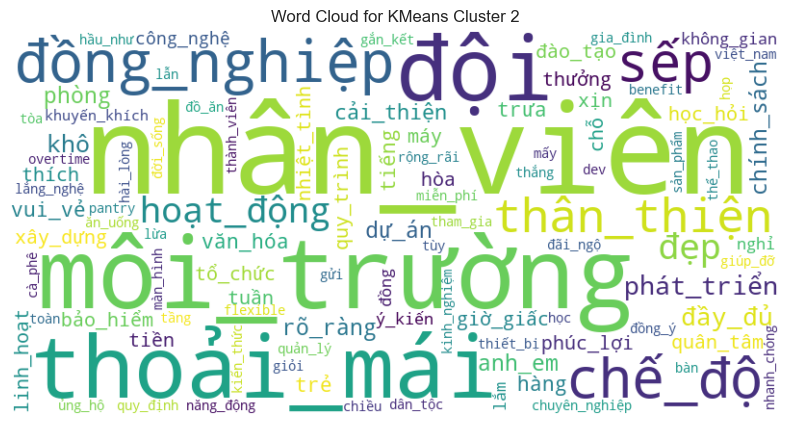

In [46]:
for cluster_id in sorted(docs["cluster"].unique()):
    text = " ".join(docs.loc[docs["cluster"] == cluster_id, "lda_text"])
    wc = WordCloud(
        width=800, height=400, background_color="white",
        max_words=100, collocations=False
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for KMeans Cluster {cluster_id}")
    plt.show()

### Topics for each cluster:


- Cluster 0
Insight:
Focus on teamwork and friendly environment.
Key words: “nhân viên” (employee), “đội” (team), “thân thiện” (friendly), “môi trường” (environment), “hoạt động” (activity), “đồng nghiệp” (colleague), “thoải mái” (comfortable).

Typical cluster: Reviews emphasize a positive, supportive team and work atmosphere.

- Cluster 1
Insight:
Emphasis on comfort, benefits, and clear policies.
Key words: “thoải mái” (comfortable), “chế độ” (policy/benefits), “môi trường” (environment), “đồng nghiệp” (colleague), “nhân viên” (employee), “rõ ràng” (clear), “văn hóa” (culture).

Typical cluster: Highlights good benefits, comfortable workspace, clear policies, and friendly colleagues.

- Cluster 2
Insight:
Opportunities for learning, project work, and professional growth.
Key words: “dự án” (project), “học hỏi” (learning), “phát triển” (development), “đào tạo” (training), “môi trường” (environment), “nhân viên” (employee), “thân thiện” (friendly).

Typical cluster: Focuses on learning opportunities, training, and project-based experience, along with a friendly environment.



## Save results

In [47]:
docs[["Company Name", "cluster", "lda_text"]].to_csv("outputs/company_clusters_lda.csv", index=False)
print("💾 Saved: outputs/company_clusters_lda.csv")

import json
feature_names = vectorizer.get_feature_names_out()
topics = [{"topic": i, "words": [feature_names[j] for j in topic.argsort()[:-11:-1]]} for i, topic in enumerate(lda.components_)]
with open("outputs/lda_topics.json", "w") as f:
    json.dump(topics, f)

💾 Saved: outputs/company_clusters_lda.csv


# 6 · Dashboard Implementation <a id="dashboard-implementation"></a>


## Please run "streamlit run streamlit_app.py" to use this app

In [48]:
# Calculate review count per company
review_counts = (
    df.groupby("Company Name")["review"].count()
    .rename("review_cnt")
    .reset_index()
)

# Merge counts into docs
docs_dash = docs.merge(review_counts, on="Company Name", how="left")

# Add unique id (just integer index + 1; or you could join real company id if you have one)
docs_dash = docs_dash.copy()
docs_dash["id"] = docs_dash.index + 1  # start from 1, or use 0 if you prefer

# Rename columns for dashboard
docs_dash = docs_dash.rename(columns={
    "Company Name": "CompanyName",
    "cluster": "cluster_best"
})

# Select dashboard columns
dashboard_cols = [
    "id",
    "CompanyName",
    "review_cnt",
    "cluster_best"
]

In [49]:
# Save to csv
docs_dash[dashboard_cols].to_csv("outputs/company_clusters.csv", index=False)

print("\n✅ Dashboard bundle ready:")
print("   clean_reviews.csv · company_clusters_lda.csv")
print("   company_clusters.csv  ·  lda_topics.json  ·  cluster_terms.json")



✅ Dashboard bundle ready:
   clean_reviews.csv · company_clusters_lda.csv
   company_clusters.csv  ·  lda_topics.json  ·  cluster_terms.json
